<a href="https://colab.research.google.com/github/stripen/SEMINARIO/blob/main/Laborator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 1**

##JUAN ESTIVEN SIERRA
##COD:2444

Librerias

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Un DataFrame es una estructura de datos, Pandas organiza la información en filas y columnas. En esta biblioteca, las columnas individuales se denominan Serie

In [67]:
data = {'year': [
        2010, 2011, 2012,
        2010, 2011, 2012,
        2010, 2011, 2012
       ],
        'team': [
            'FCBARCELONA', 'FCBARCELONA',
            'FCBARCELONA', 'RMADRID',
            'RMADRID', 'RMADRID',
            'VALENCIACF', 'VALENCIACF',
            'VALENCIACF'
        ],
        'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':[6, 7, 4, 5, 4, 7, 8, 10, 8],
        'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }
football = pd.DataFrame(data, columns=[
    'year','team', 'wins', 'draws', 'losses'
])

Vamos a leer y mostrar el contenido de un archivo .CSV utilizando la función 'read'. Esta función es capaz de leer varios tipos de archivos

In [68]:
edu = pd.read_csv('/content/educ_figdp_1_Data.csv',
                   na_values= ':',
                   usecols= ["TIME", "GEO", "Value"])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


'head' muestra por defecto solo las primeras 5 filas, pero se puede especificar un número diferente de filas si se desea

In [69]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95



'Tail' realiza la misma funcion que 'head' pero de abajo hacia arriba

In [70]:
edu.tail ()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


La función 'describe' nos permite obtener la desviación estándar, los valores mínimo y máximo, el recuento, así como los percentiles por defecto (25, 50 y 75) para todos los valores de cada columna

In [71]:
edu.describe ()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


Tambien se puden seleccionar sub-conjuntos de datos de la tabla, de la siguiente manera

In [72]:
edu ['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

Para especificar un sub-conjunto de filas, podemos usar los parámetros de esta forma: [inicio: fin]

In [73]:
edu [10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


El método 'loc' devuelve un elemento situado en una fila, utilizando el nombre de la fila y la columna. En este ejemplo, extraemos las filas TIME y GEO, desde la posición 90 hasta la 94. El método 'ix' se usaba para este propósito en Python 2

In [74]:
edu.loc [90:94, ['TIME', 'GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


Una manera alternativa de seleccionar un subconjunto de datos es mediante indexación booleana, también conocida como filtro. En este ejemplo, se muestra cómo filtrar los valores que son menores o iguales a 6.5, empezando desde el final hacia el principio de los datos.

In [75]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


En esta situación, se seleccionarán todos los valores que sean nulos o falsos utilizando la función 'isnull'. Al añadirle la función 'head', se mostrarán estos datos desde arriba hacia abajo

In [76]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


Cuando se utiliza 'axis = 0', se recorre el arreglo por columnas. Con 'axis = 1', el recorrido es por filas. La función 'max' devuelve el valor más grande en este contexto, que puede ser de una columna específica.

In [77]:
edu.max (axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

Existe una diferencia entre las funciones genéricas de Python y las de Pandas. En Python, la función 'max' devuelve NaN si alguno de los valores es NaN, ya que según la interpretación matemática, NaN sería el máximo. En cambio, en Pandas, los valores NaN se consideran como valores perdidos, por lo que la función 'max' devuelve solo los números máximos válidos.

In [78]:
print ("Pandas max function:", edu['Value'].max())
print ("Python max function:", max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Se aplicará una operación de división a toda la fila de la columna 'Value', y esto se puede realizar con otras operaciones aritméticas también. Para limitar los resultados, utilizaremos 'head'.

In [79]:
s= edu["Value"]/100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

La función 'sqrt' se utiliza para calcular la raíz cuadrada de un valor. En este caso, 'apply' se emplea para aplicar la función 'sqrt' a cada elemento de una fila o columna.

In [80]:
s= edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

Cuando se necesita crear una función específica, es posible utilizar una función en línea, conocida como lambda. En esta expresión lambda, se especifican los parámetros entre la palabra 'lambda' y los dos puntos. La variable 'C' simplemente almacena los datos de la columna 'Value' de la tabla, permitiendo realizar operaciones.

In [81]:
s= edu["Value"].apply (lambda d: d**2)
s.head ()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Se crea la columna 'ValueNorm' usando el operador '='. Los datos de esta columna se llenan con los valores obtenidos al dividir cada valor de la columna 'Value' por el valor máximo de esa misma columna.

In [82]:
edu['ValueNorm'] =edu ['Value']/edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Para eliminar una columna (con 'axis=1') o una fila (con 'axis=0') creada, se utiliza la función 'drop'. Por defecto, esta función devuelve una copia de los datos modificados en lugar de sobrescribir el DataFrame original, preservando así el DataFrame original. Sin embargo, si no se desea conservar los valores antiguos, se puede establecer el argumento 'inplace' en True. Por lo general, 'inplace' está configurado en False por defecto.

In [83]:
edu.drop('ValueNorm', axis =1, inplace= True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


En lugar de la función 'append', que ya no se utiliza en las versiones recientes de Pandas, utilizamos '.loc' para agregar una nueva fila. La estructura sería la siguiente: primero se crea una variable para almacenar los nuevos valores, donde cada columna se especifica entre corchetes con comillas simples o dobles seguidas de su respectivo valor. En la siguiente línea, se utiliza '.loc' en el DataFrame donde se desean agregar los datos, y se usa la función 'len' para aplicar todos los conjuntos de datos a la tabla

In [84]:
NuvaFila = {'TIME': 2000, 'Value': 5.00, 'GEO': 'a'}
edu.loc[len(edu)] = NuvaFila
edu.tail(15)

,TIME,GEO,Value
370,2010,Slovakia,4.22
371,2011,Slovakia,4.06
372,2000,Finland,5.89
373,2001,Finland,6.06
374,2002,Finland,6.22
375,2003,Finland,6.43
376,2004,Finland,6.42
377,2005,Finland,6.30
378,2006,Finland,6.18
379,2007,Finland,5.90



Elimiaremos la ultima fila agregada usando la funcion 'drop', especificando que es una fila 'axis = 0', y como es la ultima fila podemos usar la funcion 'max'

In [85]:
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail(15)

,TIME,GEO,Value
369,2009,Slovakia,4.09
370,2010,Slovakia,4.22
371,2011,Slovakia,4.06
372,2000,Finland,5.89
373,2001,Finland,6.06
374,2002,Finland,6.22
375,2003,Finland,6.43
376,2004,Finland,6.42
377,2005,Finland,6.30
378,2006,Finland,6.18



usamos la función dropna con el argumento subset, subset=['Value'] le dice a pandas que solo considere los valores faltantes en la columna 'Value'.

In [86]:
eduDrop = edu.dropna(subset=["Value"], axis = 0)
eduDrop.head(10)

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
7,2007,European Union (28 countries),4.92
8,2008,European Union (28 countries),5.04
9,2009,European Union (28 countries),5.38
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25


Para eliminar filas con valores nulos en Pandas, se utiliza 'dropna'. Específicamente, se usa el parámetro 'how' con el valor 'any' para eliminar todas las filas que contengan al menos un valor nulo. Esto se restringe a un subconjunto específico de columnas utilizando el parámetro 'subset'.

In [87]:
eduDrop = edu.dropna(how = 'any', subset=['Value'])
eduDrop.head(10)

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
7,2007,European Union (28 countries),4.92
8,2008,European Union (28 countries),5.04
9,2009,European Union (28 countries),5.38
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25


Con el metodo 'fillna()' podemos rellenar los valores nulos, eso dandole el valor que queremos que le ponga, en este casi seria '0', dentro de este metodo tiene que ir el nombre de la columna a la cual le queremos poner el valor en vez de los valores nulos.

In [88]:
eduFilled = edu.fillna(value = {'Value': 0})
eduFilled.head(10)

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
7,2007,European Union (28 countries),4.92
8,2008,European Union (28 countries),5.04
9,2009,European Union (28 countries),5.38


Con la funcion 'sort' podemos organizar los datos de manera que qeramos en caso seria mostrar los primeros 10 datos y ordenarlos de manera acendete.

In [89]:
edu.sort_values(by = 'Value', ascending = False,
                inplace = True)
edu.head(10)

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44
124,2004,Denmark,8.43
123,2003,Denmark,8.33
125,2005,Denmark,8.30
120,2000,Denmark,8.28
225,2009,Cyprus,7.98


Es importante recordar que en Pandas, el argumento 'inplace' indica si se sobrescribirá el DataFrame original en lugar de devolver una nueva instancia. Además, al establecer 'ascending=True', los datos se ordenarán de manera ascendente, es decir, de menor a mayor.

In [90]:
edu.sort_index(axis = 0, ascending = True, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


En este caso, estamos agrupando los datos por país, sin considerar el año, utilizando la función 'mean' como método de agregación. El resultado es una tabla donde cada país tiene sus valores medios en la columna 'Value'.

In [91]:
group = edu[['GEO', 'Value']].groupby('GEO').mean()
group.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


Podemos reorganizar la estructura de nuestros datos cambiando los índices y las columnas usando 'pivot_table'. Con esta función, podemos especificar qué columnas se convertirán en los nuevos índices, valores y columnas.

Por ejemplo, si queremos transformar nuestro DataFrame para que los nombres de los países sean los índices, las columnas sean los años a partir de 2006, y los valores sean tomados de la columna 'Value', primero filtramos los datos y luego aplicamos 'pivot_table'.

In [92]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                        index = ['GEO'],
                        columns= ['TIME'])
pivedu.head(10)

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Euro area (13 countries),4.87,4.80,4.94,5.32,5.28,5.15
Euro area (15 countries),4.87,4.81,4.95,5.32,5.29,5.16



Ahora podemos utilizar el nuevo índice para seleccionar filas específicas por etiqueta, utilizando .loc

In [93]:
pivedu.loc[['Spain','Portugal'], [2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


Primero, eliminamos las entradas correspondientes a la zona euro y ajustamos el nombre de Alemania usando la función 'rename'. Luego, eliminamos todas las filas que contienen valores NaN con 'dropna'. Después, podemos clasificar los datos utilizando la función 'rank'. Es importante notar que el parámetro 'ascending=False' hace que el ranking se realice de los valores más altos a los más bajos.

In [94]:
pivedu = pivedu.drop([
                      'Euro area (15 countries)',
                      'Euro area (15 countries)',
                      'Euro area (17 countries)',
                      'Euro area (18 countries)',
                      'European Union (25 countries)',
                      'European Union (27 countries)',
                      'European Union (28 countries)'
                  ],
                     axis = 0)
pivedu = pivedu.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending=False, method='first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,22.0,22.0,21.0,21.0,23.0,23.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,20.0,21.0,22.0,22.0,21.0,20.0



A continuación, podemos ordenar los valores resultantes para recuperar los cinco primeros países de los últimos 6 años.

In [95]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending=False, method='dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Entiendo, pero parece que falta la descripción de la celda siguiente para proporcionar un parafraseo y un resumen precisos. Podrías mostrarme la celda siguiente o proporcionar más contexto sobre lo que quieres que se parafrasee y se resuma?

<Axes: title={'center': 'Total Values'}, xlabel='GEO'>

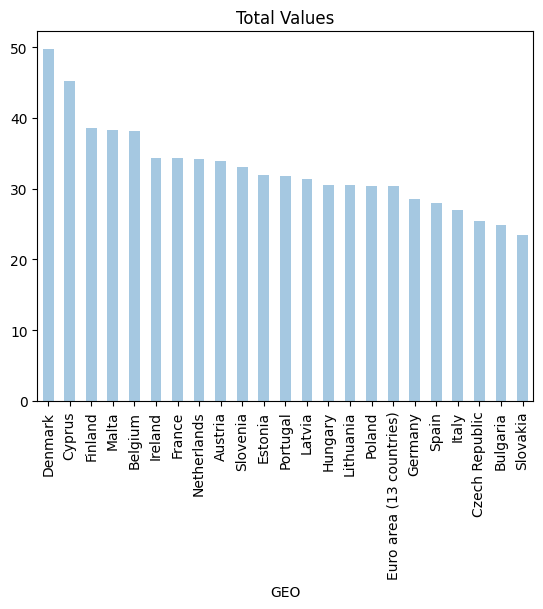

In [96]:
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = 'bar', style = 'b', alpha = 0.4, title='Total Values')

Para representar los datos acumulados de cada país en los últimos 6 años, usamos un gráfico de barras horizontales (kind='barh') con el parámetro 'stacked' establecido en True para apilar los valores de cada año en una barra por país. Debido a que el gráfico por defecto tiene solo 5 colores, especificamos más colores utilizando la opción 'color'. Para personalizar la leyenda del gráfico, usamos el método 'legend' del objeto de ejes devuelto por la función de trazado, ajustando la posición con 'loc' para indicar la ubicación relativa y utilizando 'bbox_to_anchor' para posicionar la leyenda fuera del gráfico de manera absoluta.

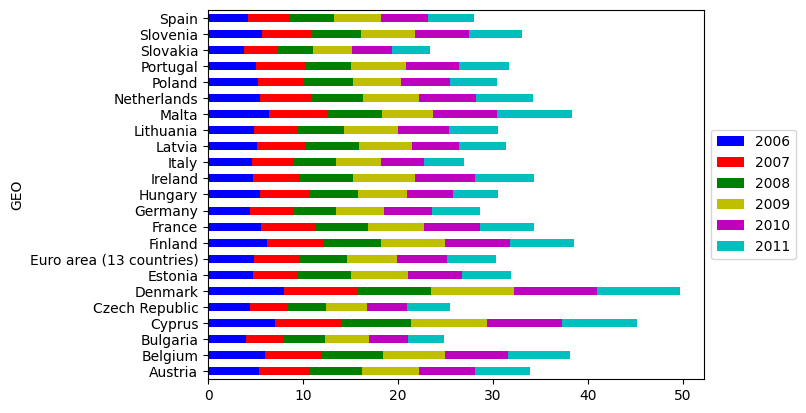

In [97]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind = 'barh', stacked = True, color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))